In [20]:
import numpy as np
import pandas as pd

In [22]:
train_df = pd.read_csv('input/train.csv', index_col=0)
test_df = pd.read_csv('input/test.csv', index_col=0)

In [24]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001612F2C9E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000161302E3F98>]], dtype=object)

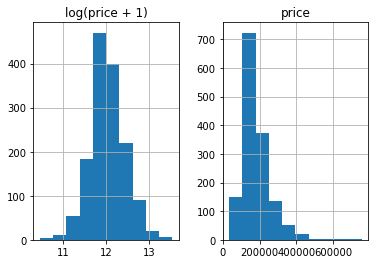

In [25]:
# 准备合并数据，先把price列拿出来，是数据尺寸一致，可以合并
# 变换数据，使数据平滑（变为高斯正态分布），log1p()就需要expm1(); 同理，log()就需要exp()
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [26]:
# 弹出label并转换数据
y_train = np.log1p(train_df.pop('SalePrice'))

In [27]:
# 合并数据
all_df = pd.concat((train_df, test_df), axis=0)

In [28]:
all_df.shape

(2919, 79)

In [31]:
all_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [33]:
all_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [36]:
all_df.count()

MSSubClass       2919
MSZoning         2915
LotFrontage      2433
LotArea          2919
Street           2919
Alley             198
LotShape         2919
LandContour      2919
Utilities        2917
LotConfig        2919
LandSlope        2919
Neighborhood     2919
Condition1       2919
Condition2       2919
BldgType         2919
HouseStyle       2919
OverallQual      2919
OverallCond      2919
YearBuilt        2919
YearRemodAdd     2919
RoofStyle        2919
RoofMatl         2919
Exterior1st      2918
Exterior2nd      2918
MasVnrType       2895
MasVnrArea       2896
ExterQual        2919
ExterCond        2919
Foundation       2919
BsmtQual         2838
                 ... 
HalfBath         2919
BedroomAbvGr     2919
KitchenAbvGr     2919
KitchenQual      2918
TotRmsAbvGrd     2919
Functional       2917
Fireplaces       2919
FireplaceQu      1499
GarageType       2762
GarageYrBlt      2760
GarageFinish     2760
GarageCars       2918
GarageArea       2918
GarageQual       2760
GarageCond

In [37]:
all_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond

In [38]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [39]:
# MSSubClass是category，但实为数字
all_df['MSSubClass'].dtypes

dtype('int64')

In [40]:
# 转为str
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [41]:
# 查看各个类型统计数量
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [42]:
# one_hot变换
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
all_df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [44]:
# 把所有category数据都做one_hot变换
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
# 查看缺失值
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [46]:
# 使用平均值填补空缺值
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [47]:
# 填补空缺
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [48]:
# 查看总空缺值
all_dummy_df.isnull().sum().sum()

0

In [49]:
# 标准化数值类型数据
# 查看数值型（非字符型）数据列名
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [50]:
# 标准化数据，（X-X'）/S
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [51]:
# 建立模型，把数据拆分为原来的训练集和测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [52]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [53]:
# 转为numpy格式
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [54]:
# 使用岭回归
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [56]:
# 调参，存下所有的CV值，看看哪个alpha值更好
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

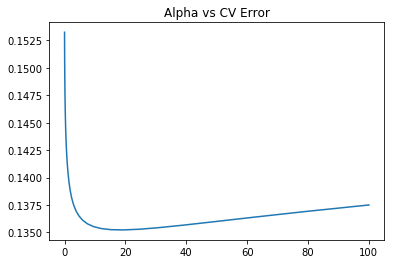

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [58]:
# 最好值大约在18左右，错误率0.135左右
ridge = Ridge(18)

In [87]:
# 做一点高级的Ensemble
from sklearn.ensemble import BaggingRegressor

params = [1, 10, 15, 20, 25, 30, 40, 50, 60]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

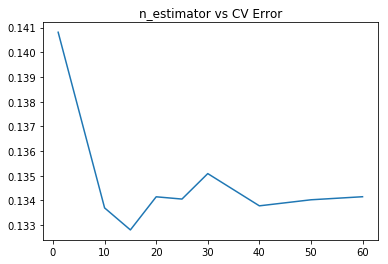

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [61]:
# 可见，前一个版本中，ridge最优结果也就是0.135；而这里，使用15个小ridge分类器的bagging，达到了低于0.133的结果。
# 使用bagging自带的DecisionTree模型试试
params = [10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

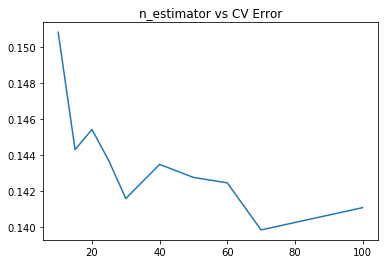

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [63]:
# 大概取70左右，错误率在0.14左右，效果不如岭回归好

# 换boosting提升算法
from sklearn.ensemble import AdaBoostRegressor

In [77]:
params = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

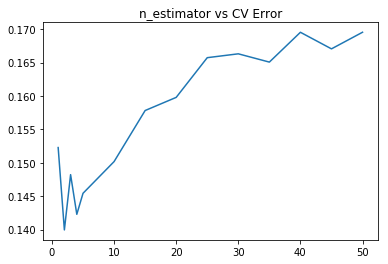

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [71]:
# 使用adaboost自带的DecisionTree模型试试
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

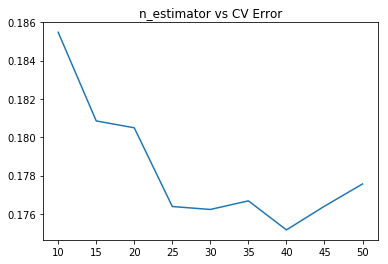

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [79]:
# 使用xgboost
from xgboost import XGBRegressor

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [119]:
# 使用xgboost自带方法模型
params = [1,2,3,4,5,6]
learning_rates = np.linspace(0.01, 0.2, 20)
test_scores = []
params_eta_index = []
for param in params:
    for learning_rate in learning_rates:
        clf = XGBRegressor(max_depth=param,learning_rate=learning_rate)
        test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
        test_scores.append(np.mean(test_score))
        params_eta_index.append((param,learning_rate))

In [127]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# # %matplotlib inline

# fig = plt.figure()
# ax = Axes3D(fig)
# # ax.plot_surface(params, learning_rates, test_scores, rstride=1, cstride=1, label='max_depth vs CV Error') 
# ax.scatter(params, learning_rates, test_scores)
# plt.title("max_depth vs CV Error");

# 查看最小值，此时参数（树深，学习率）
min(test_scores),params_eta_index[test_scores.index(min(test_scores))]

(0.1256943745253491, (4, 0.18000000000000002))

In [129]:
# 深度为4，学习率为0.18的时候，错误率缩小到0.1257
# 还原label值

clf = XGBRegressor(max_depth=4,learning_rate=0.18)
clf.fit(X_train,y_train)
prediction = np.expm1(clf.predict(X_test))
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': prediction})

In [130]:
submission_df.head()

,Id,SalePrice
0,1461,130252.757812
1,1462,165171.984375
2,1463,186670.906250
3,1464,194729.875000
4,1465,181160.531250


In [131]:
submission_df.to_csv(r'input/house_price_xgb.csv',index=False)

In [132]:
# 一个正经的Ensemble是把这群model的预测结果作为新的input，再做一次预测
clf_1 = BaggingRegressor(n_estimators=15, base_estimator=ridge)
clf_2 = AdaBoostRegressor(n_estimators=40)
clf_3 = XGBRegressor(max_depth=4,learning_rate=0.18)

clf_1.fit(X_train,y_train)
clf_2.fit(X_train,y_train)
clf_3.fit(X_train,y_train)

prediction_1 = np.expm1(clf_1.predict(X_test))
prediction_2 = np.expm1(clf_2.predict(X_test))
prediction_3 = np.expm1(clf_3.predict(X_test))

submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': (prediction_1 + prediction_2 + prediction_3)/3.0})
submission_df.head()

,Id,SalePrice
0,1461,116863.117585
1,1462,146939.552056
2,1463,173155.839407
3,1464,189811.289148
4,1465,186498.146387


In [133]:
submission_df.to_csv(r'input/house_price_xgb_2.csv',index=False)

In [135]:
###############################################################
# 第二种
# 一个正经的Ensemble是把这群model的预测结果作为新的input，再做一次预测
# 模型加权
clf_1 = BaggingRegressor(n_estimators=15, base_estimator=ridge)
clf_2 = AdaBoostRegressor(n_estimators=40)
clf_3 = XGBRegressor(max_depth=4,learning_rate=0.18)

clf_1.fit(X_train[:1000],y_train[:1000])
clf_2.fit(X_train[:1000],y_train[:1000])
clf_3.fit(X_train[:1000],y_train[:1000])

prediction_1 = np.expm1(clf_1.predict(X_train[1000:]))
prediction_2 = np.expm1(clf_2.predict(X_train[1000:]))
prediction_3 = np.expm1(clf_3.predict(X_train[1000:]))

submission_df = pd.DataFrame(data= {'prediction_1' : prediction_1, 'prediction_2': prediction_2, 'prediction_3' : prediction_3})
submission_df.head()

,prediction_1,prediction_2,prediction_3
0,75804.137683,79550.431088,68169.710938
1,89172.204615,88017.562551,70754.765625
2,245751.108648,277344.931622,245477.343750
3,140033.814049,147015.494785,136521.343750
4,195729.188187,214663.346889,185039.187500


In [136]:
# 使用xgboost自带方法模型
params = [1,2,3,4,5,6]
learning_rates = np.linspace(0.01, 0.2, 20)
test_scores = []
params_eta_index = []
for param in params:
    for learning_rate in learning_rates:
        clf = XGBRegressor(max_depth=param,learning_rate=learning_rate)
        test_score = np.sqrt(-cross_val_score(clf, submission_df, y_train[1000:], cv=10, scoring='neg_mean_squared_error'))
        test_scores.append(np.mean(test_score))
        params_eta_index.append((param,learning_rate))

In [137]:
# 查看最小值，此时参数（树深，学习率）
min(test_scores),params_eta_index[test_scores.index(min(test_scores))]

(0.12623017425237174, (2, 0.080000000000000002))

In [138]:
# 综合模型，深度为2，学习率为0.08的时候，错误率缩小到0.126
# 还原label值

clf = XGBRegressor(max_depth=2,learning_rate=0.08)
clf.fit(X_train,y_train)
prediction = np.expm1(clf.predict(X_test))
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': prediction})

In [139]:
submission_df.head()

,Id,SalePrice
0,1461,122896.820312
1,1462,153626.562500
2,1463,174299.609375
3,1464,179548.718750
4,1465,197535.343750


In [140]:
submission_df.to_csv(r'input/house_price_xgb_3.csv',index=False)